##About COVID-19


![](https://media.giphy.com/media/dVuyBgq2z5gVBkFtDc/giphy.gif)

**Coronavirus disease 2019(COVID-19) is an infectious spreading disease,which is casued by severe acute respiratory syndrome coronavirus 2(SARS-Cov-2).This disease was first found in 2019 in Wuhan distirct of China, and is spreading tremendously across the globe,resulted in pandemic declaration by World Health Organization. This diesease has hit the world population wth almost 20 million people around the world sufferening from corona virus all over the Globe**









# The Story of COVID-19 in India

#### The COVID-19 pandemic is the defining global health crisis of our time and the greatest global humanitarian challenge the world has faced since World War II. The virus has spread widely, and the number of cases is rising daily as governments work to slow its spread. India has moved quickly, implementing a proactive, nationwide, lockdown, with the goal of flattening the curve and using the time to plan and resource responses adequately.

**Corona Virus Explained in Simple Terms:**
- Let's say Raghav got infected yesterday, but he won't know it untill next 14 days
- Raghav thinks he is healthy but he is infecting 10 persons per day
- Now these 10 persons think they are completely healthy, they travel, go out and infect 100 others
- These 100 persons think they are healthy but they have already infected 1000 persons
- No one knows who is healthy or who can infect you
- All you can do is be responsible, stay in quarentine

![](https://i.imgur.com/HdKy1CA.png)


##Problem Statement:

on **25th March Afternoon** and India had reported its **9th** death with **562 total confirmed cases** due to COVID-19. Fresh cases from Manipur, Bihar, Gujrat, and Madhya Pradhesh have been reported by the Union Ministry of Health and Family Welfare.

As the coronavirus outbreak continues to spread in the country, the question that we as Indians are trying to answer is :

**"Will India be able to tackle this pandemic or are we going to witness another Italy/ S.Korea/ Wuhan?"**
### Goal:
We need a strong model that predicts how the virus could spread across different countries and regions. The goal of this task is to build a model that predicts the spread of the virus in the next 7 days.
###Tasks to be performed:
- Analysing the present condition in India
- Is this trend similar to Italy/S. Korea/ Wuhan
- Exploring the world wide data
- Forecasting the world wide COVID-19 cases

###Importing the required libraries

In [ ]:
# importing the required libraries

import numpy as np# importing the required libraries
import pandas as pd #Pandas is a high-level data manipulation tool developed by Wes McKinney. It is built on the Numpy package and its key data structure is called the DataFrame. DataFrames allow you to store and manipulate tabular data in rows of observations and columns of variables
# Visualisation libraries
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
#plt in a same window
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
import plotly.express as px #Plotly Express is a new high-level Python visualization library: it’s a wrapper for Plotly.py that exposes a simple syntax for complex charts
import plotly.graph_objects as go #change properties of graph and traces.
import folium          #Folium allows us to create maps with different tiles like Stamen Terrain, Stamen Toner, Stamen Water Color, CartoDB Positron, and many more. ... Each tileset shows different features of a map and is suitable for different purposes. For example, Stamen Terrain features hill shading and natural vegetation colors.
from folium import plugins
from statsmodels.tsa.arima_model import ARIMA
import plotly.express as px
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# Part 1: Analysing the present condition in India


**How it started in India?:**

The first **COVID-19** case was reported on 30th January 2020 when a student arrived **Kerala** from Wuhan. Just in next 2 days, Kerela reported 2 more cases. For almost a month, no new cases were reported in India, however, on 2nd March 2020, five new cases of corona virus were reported in Kerala again and since then the cases have been rising affecting **25** states, till now *(Bihar and Manipur being the most recent)*. Here is a brief timeline of the cases in India.
###COVID-19 in India - Timeline
 <br>


![](https://imgur.com/YbPWckK.png)

## 1.1 Reading the Datasets


In [ ]:
#Learn how to read a .xls file by creating a dataframe using pandas
# Reading the datasets

df= pd.read_excel('/content/covid19_india_data.xlsx')
df_india = df.copy()
df


,Name of State / UT,Total Confirmed cases (Indian National),Cured,Death
0,Andhra Pradesh,44609,21763,586
1,Andaman and Nicobar Islands,198,145,0
2,Arunachal Pradesh,650,274,3
3,Assam,22918,15165,53
4,Bihar,25136,15536,208
5,Chandigarh,700,485,12
6,Chhattisgarh,5233,3658,24
7,Dadra and Nagar Haveli,602,414,2
8,Delhi,121582,101274,3597
9,Goa,3484,2038,21


In [ ]:
# Coordinates of India States and Union Territories
India_coord = pd.read_excel('/content/Indian Coordinates(1).xlsx')
india_covid_19 = pd.read_csv('/content/covid_19_india.csv')
#Day by day data of India, Korea, Italy and Wuhan
dbd_India = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name='India')
dbd_Italy = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name="Italy")
dbd_Korea = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name="Korea")
dbd_Wuhan = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name="Wuhan")
dbd_India[['Date','Total Cases','New Cases']].tail()

,Date,Total Cases,New Cases
51,2020-03-21,330,86
52,2020-03-22,396,66
53,2020-03-23,499,103
54,2020-03-24,536,37
55,2020-03-25,562,26


## 1.2 Analysing COVID19 Cases in India

In [ ]:
#Learn how to play around with the dataframe and create a new attribute of 'Total Case'
#Total case is the total number of confirmed cases (Indian National + Foreign National)

total_cases = india_covid_19['Confirmed'].sum()
print('Total number of confirmed COVID 2019 cases across India till date (13/08/20):', total_cases)



Total number of confirmed COVID 2019 cases across India till date (13/08/20): 49102037


In [ ]:
india_covid_19

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
4771,4772,02/08/20,8:00 AM,Telengana,-,-,46502,530,64786
4772,4773,02/08/20,8:00 AM,Tripura,-,-,3463,23,5233
4773,4774,02/08/20,8:00 AM,Uttarakhand,-,-,4330,83,7447
4774,4775,02/08/20,8:00 AM,Uttar Pradesh,-,-,51334,1677,89048


## 1.3 Number of Active COVID-19 cases in affected State/Union Territories   

In [ ]:
state_cases = india_covid_19.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()

state_cases = state_cases.astype({'Deaths': 'int'})
state_cases['Active'] = state_cases['Confirmed'] - (state_cases['Deaths']+state_cases['Cured'])
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)#calculate death rate
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured"]/state_cases["Confirmed"],2)#caluclate cure rate
state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Cured"])\
                        .background_gradient(cmap='Oranges',subset=["Active"])\
                        .background_gradient(cmap='Greys',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='BuGn',subset=["Cure Rate (per 100)"])#print after sorting by eleminating null values

,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
22,Maharashtra,431719,15316,266883,149520,3.550000,61.820000
32,Tamil Nadu,251738,4034,190966,56738,1.600000,75.860000
1,Andhra Pradesh,150209,1407,76614,72188,0.940000,51.000000
11,Delhi,136716,3989,122131,10596,2.920000,89.330000
18,Karnataka,129287,2412,53648,73227,1.870000,41.500000
39,Uttar Pradesh,89048,1677,51334,36037,1.880000,57.650000
41,West Bengal,72777,1629,50517,20631,2.240000,69.410000
35,Telengana,64786,530,46502,17754,0.820000,71.780000
13,Gujarat,62463,2464,45699,14300,3.940000,73.160000
36,Telengana***,57142,480,42909,13753,0.840000,75.090000


In [ ]:
df_full = pd.merge(India_coord,df,on='Name of State / UT')
df_full

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Indian National),Cured,Death
0,Andhra Pradesh,14.750429,78.570026,44609,21763,586
1,Delhi,28.669993,77.230004,121582,101274,3597
2,Haryana,28.450006,77.019991,25547,19318,344
3,Karnataka,12.570381,76.919997,59652,21775,1240
4,Kerala,8.900373,76.569993,11659,5199,40
5,Maharashtra,19.250232,73.160175,300937,165663,11596
6,Punjab,31.519974,75.980003,9792,6454,246
7,Rajasthan,26.449999,74.639981,28500,21144,553
8,Telengana,18.112400,79.019300,43780,30607,409
9,Tamil Nadu,12.920386,79.150042,165714,113856,2403


## 1.4 Visualising the spread geographically

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/COVID-19_India_Total_Cases_Animated_Map.gif/527px-COVID-19_India_Total_Cases_Animated_Map.gif)

In [ ]:
# Learn how to use folium to create a zoomable map
df_full = pd.merge(India_coord,df,on='Name of State / UT')
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Total Confirmed cases (Indian National)'], df_full['Name of State / UT']):
    folium.CircleMarker([lat, lon], radius=value*0.02,color='red',fill_opacity=0.7 ).add_to(map)
map

## 1.5 Map View

In [ ]:
covid_India_cases = pd.read_csv('/content/covid_19_india.csv')
covid_India_cases.rename(columns={'State/UnionTerritory': 'State', 'Cured': 'Recovered', 'Confirmed': 'Confirmed'}, inplace=True)

statewise_cases = pd.DataFrame(covid_India_cases.groupby(['State'])['Confirmed', 'Deaths', 'Recovered'].max().reset_index())
last=statewise_cases
pos=pd.read_csv('/content/datasets_570235_1034174_UTM ZONES of INDIA.csv')
ind_grp=last.merge(pos , left_on='State', right_on='State / Union Territory')

In [ ]:

import folium


map = folium.Map(location=[20, 78], zoom_start=4,tiles='cartodbpositron')

for lat, lon,state,Confirmed,Recovered,Deaths in zip(ind_grp['Latitude'], ind_grp['Longitude'],ind_grp['State'],ind_grp['Confirmed'],ind_grp['Recovered'],ind_grp['Deaths']):
    folium.CircleMarker([lat, lon],
                        radius=5,
                        color='YlOrRd',
                      popup =(
                    'State: ' + str(state) + '<br>'
                    'Confirmed: ' + str(Confirmed) + '<br>'
                      'Recovered: ' + str(Recovered) + '<br>'
                      'Deaths: ' + str(Deaths) + '<br>'),

                        fill_color='red',
                        fill_opacity=0.7 ).add_to(map)
map

## 1.6 Heat Map

In [ ]:
from folium.plugins import HeatMap
m = folium.Map(location = [20.5937, 78.9629], zoom_start = 4,tiles='cartodbpositron')

heat_data = [[row['Latitude'],row['Longitude']] for index, row in ind_grp.iterrows()]
HeatMap(heat_data,radius=16.5, blur = 5.5).add_to(m)

m

## 1.7 Confirmed vs Recovered figures

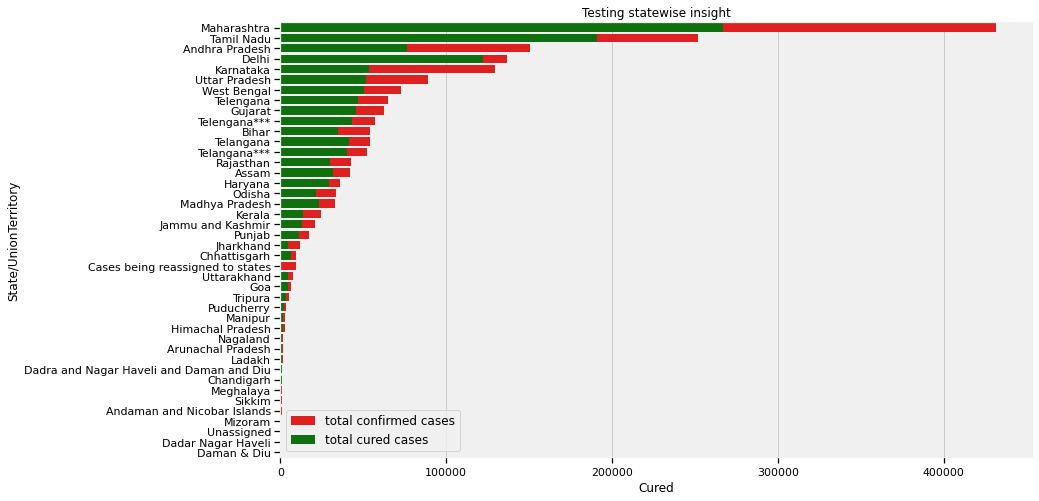

In [ ]:
#Learn how to use Seaborn for visualization
import seaborn as sns
f, ax = plt.subplots(figsize=(12, 8))
data = state_cases[['State/UnionTerritory','Confirmed','Cured','Deaths']]
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.barplot(data=data,x='Confirmed',y='State/UnionTerritory',color='red',orientation='horizontal',label='total confirmed cases')
sns.barplot(data=data,x='Cured',y='State/UnionTerritory',color='green',orientation='horizontal',label='total cured cases')
plt.title('Testing statewise insight')
plt.legend(frameon=True,fontsize=12)


## COVID 19 CASES IN INDIA

In [ ]:
import IPython
IPython.display.HTML('<div class="flourish-embed" data-src="story/466323" data-url="https://flo.uri.sh/story/466323/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>')

## 1.8 How the Coronavirus cases are rising?

In [ ]:
#This cell's code is required when you are working with plotly on colab
import plotly
plotly.io.renderers.default = 'colab'


In [ ]:
covid_19_india = pd.read_csv('/content/covid_19_india1.csv')
covid_19_india.set_index('Date')
df_confirmed_deaths_cured = covid_19_india.loc[:, ['State/UnionTerritory', 'Confirmed','Deaths','Cured']]
df_confirmed_deaths_cured.index=pd.to_datetime(covid_19_india['Date'],format="%d/%m/%y")
df_confirmed_deaths_cured.tail()


,State/UnionTerritory,Confirmed,Deaths,Cured
Date,,,,
2020-09-02,Telengana,130589,846,97402
2020-09-02,Tripura,12702,118,7847
2020-09-02,Uttarakhand,20398,280,14076
2020-09-02,Uttar Pradesh,235757,3542,176677
2020-09-02,West Bengal,165721,3283,137616


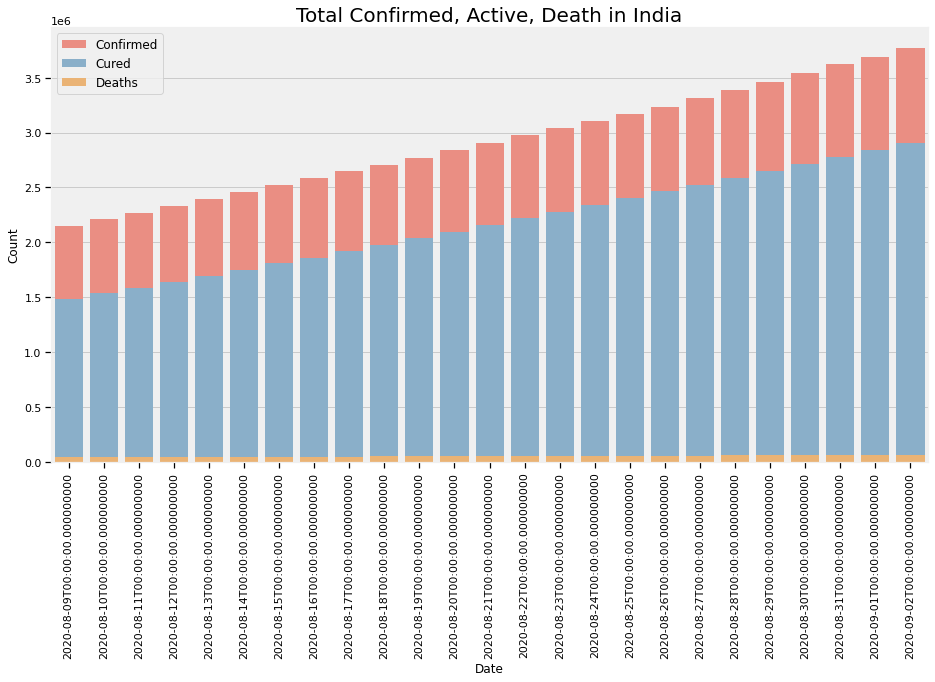

In [ ]:

df1=df_confirmed_deaths_cured.reset_index()
df1=df1.groupby('Date').sum()
df1.reset_index(inplace=True)
df2=df1.tail(25)
plt.figure(figsize=(14,8))
sns.barplot(data=df2,x='Date',y='Confirmed',color=sns.color_palette('Set3')[3],label='Confirmed')
sns.barplot(data=df2,x='Date',y='Cured',color=sns.color_palette('Set3')[4],label='Cured')
sns.barplot(data=df2,x='Date',y='Deaths',color=sns.color_palette('Set3')[5],label='Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)
plt.legend(frameon=True,fontsize=12)

In [ ]:
def draw_plot(ts_array, ts_label, title, colors, mode_size, line_size, x_axis_title , y_axis_title, tickangle = 0, yaxis_type = "", additional_annotations=[]):
    # initialize figure
    fig = go.Figure()
    # add all traces
    for index, ts in enumerate(ts_array):
        fig.add_trace(go.Scatter(x=ts.index,
                                 y = ts.values,
                                 name = ts_label[index],
                                 line=dict(color=colors[index], width=line_size[index]),connectgaps=True,))
    # base x_axis prop.
    x_axis_dict = dict(showline=True,
                       showgrid=True,
                       showticklabels=True,
                       linecolor='rgb(204, 204, 204)',
                       linewidth=2,
                       ticks='outside',
                       tickfont=dict(family='Arial',size=12,color='rgb(82, 82, 82)',))
    # setting x_axis params
    if x_axis_title:
        x_axis_dict['title'] = x_axis_title

    if tickangle > 0:
        x_axis_dict['tickangle'] = tickangle

    # base y_axis prop.
    y_axis_dict = dict(showline = True,
                       showgrid = True,
                       showticklabels=True,
                       linecolor='rgb(204, 204, 204)',
                       linewidth=2,)
    # setting y_axis params
    if yaxis_type != "":
        y_axis_dict['type'] = yaxis_type

    if y_axis_title:
        y_axis_dict['title'] = y_axis_title

#     # uncomment legend if you want to move the legend around
#     legend= dict(x=1,
#                  y=1,
#                  traceorder="normal",
#                  font=dict(family="sans-serif",size=12,color="black"),
#                  bgcolor="LightSteelBlue",
#                  bordercolor="Black",
#                  borderwidth=2)

#updating the layout
    fig.update_layout(xaxis = x_axis_dict,
                      yaxis = y_axis_dict,
                      autosize=True,
                      margin=dict(autoexpand=False,l=100,r=20,t=110,),
                      showlegend=True,
                      #legend = labels
                     )

    # base annotations for any graph
    annotations = []
    # Title
    annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05, xanchor='left', yanchor='bottom',
                                  text=title,
                                  font=dict(family='Arial',size=16,color='rgb(37,37,37)'),showarrow=False))
    # adding annotations in params
    if len(additional_annotations) > 0:
        annotations.append(additional_annotations)

    #updating the layout
    fig.update_layout(annotations=annotations)

    return fig

In [ ]:

import pandas as pd
import numpy as np
confimed_cases_file_link = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
death_cases_file_link = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
recovered_cases_file_link = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
country_cases_file_link = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv"

confirmed_df = pd.read_csv(confimed_cases_file_link)

deaths_df = pd.read_csv(death_cases_file_link)

recovered_df = pd.read_csv(recovered_cases_file_link)

cases_country_df = pd.read_csv(country_cases_file_link)


confirmed_df = confirmed_df.replace(np.nan, '', regex=True)
deaths_df = deaths_df.replace(np.nan, '', regex=True)
recovered_df = recovered_df.replace(np.nan, '', regex=True)
cases_country_df = cases_country_df.replace(np.nan, '', regex=True)

# Initializing Color Array to be used across the analysis
color_arr = px.colors.qualitative.Dark24

confirmed_India_ts = confirmed_df[confirmed_df['Country/Region']=="India"]
confirmed_India_ts = confirmed_India_ts.drop(
    ['Lat','Long','Country/Region','Province/State'],axis =1).reset_index(drop=True).sum()

deaths_India_ts = deaths_df[deaths_df['Country/Region']=="India"]
deaths_India_ts = deaths_India_ts.drop(
    ['Lat','Long','Country/Region','Province/State'],axis =1).reset_index(drop=True).sum()

recovered_India_ts = recovered_df[recovered_df['Country/Region']=="India"]
recovered_India_ts = recovered_India_ts.drop(
    ['Lat','Long','Country/Region','Province/State'],axis =1).reset_index(drop=True).sum()

active_India_ts = pd.Series(
    data=np.array(
        [x1 - x2 - x3  for (x1, x2, x3) in zip(
            confirmed_India_ts.values,deaths_India_ts.values, recovered_India_ts.values)
        ]
    ),
    index= confirmed_India_ts.index
)

ts_array = [confirmed_India_ts, active_India_ts, recovered_India_ts, deaths_India_ts]
labels = ['Confirmed', 'Active', 'Recovered', 'Deaths']
colors = [color_arr[5],  color_arr[0], color_arr[2], color_arr[3]]
mode_size = [8, 8, 12, 8]
line_size = [2, 2, 4, 2]

# Calling the draw_plot function defined above
fig_3 = draw_plot(ts_array = ts_array,
                  ts_label = labels ,
                  title = "Covid-19 Case Trend in INDIA",
                  colors = colors, mode_size = mode_size,
                  line_size = line_size ,
                  x_axis_title = "Date" ,
                  y_axis_title = "Case Count",
                  tickangle = 315,
                  yaxis_type = "", additional_annotations=[])

fig_3.show()


# Part 2: Is the trend similar to Italy/ S.Korea/ Wuhan?


## 2.1 Cumulative cases in India, Italy, S.Korea, and Wuhan

In [ ]:
# import plotly.express as px
fig = px.bar(dbd_India, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.IceFire)

'''Colour Scale for plotly
https://plot.ly/python/builtin-colorscales/
'''

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Italy, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Italy', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Korea, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in South Korea', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()
fig = px.bar(dbd_Wuhan, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Wuhan', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

###Visualization Inference
- Confirmed cases in India is rising exponentially with no fixed pattern (Very less test in India)
- Confirmed cases in Italy is rising exponentially with certain fixed pattern
- Confirmed cases in S.Korea is rising gradually
- There has been only 3 confirmed cases in Wuhan since last week. They have almost controlled the COVID-19


## 2.2 Comparison between the rise of cases in Wuhan, S.Korea, Italy and India

In [ ]:
#Learn how to create subplots using plotly
# import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("S.Korea","Italy", "India","Wuhan"))

fig.add_trace(go.Bar(x=dbd_Korea['Date'], y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'], coloraxis="coloraxis")),1, 1)

fig.add_trace(go.Bar(x=dbd_Italy['Date'], y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'], coloraxis="coloraxis")),1, 2)

fig.add_trace(go.Bar(x=dbd_India['Date'], y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'], coloraxis="coloraxis")),2, 1)

fig.add_trace(go.Bar(x=dbd_Wuhan['Date'], y=dbd_Wuhan['Total Cases'],
                   marker=dict(color=dbd_Wuhan['Total Cases'], coloraxis="coloraxis")),2, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Total Confirmed cases(Cumulative)")

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

## 2.3 Trend after crossing 100 cases

In [ ]:
# import plotly.graph_objects as go

title = 'Main Source for News'
labels = ['S.Korea', 'Italy', 'India']
colors = ['rgb(122,128,0)', 'rgb(255,0,0)', 'rgb(49,130,189)']

mode_size = [10, 10, 12]
line_size = [1, 1, 8]

fig = go.Figure()


fig.add_trace(go.Scatter(x=dbd_Korea['Days after surpassing 100 cases'],
                 y=dbd_Korea['Total Cases'],mode='lines',
                 name=labels[0],
                 line=dict(color=colors[0], width=line_size[0]),
                 connectgaps=True))
fig.add_trace(go.Scatter(x=dbd_Italy['Days after surpassing 100 cases'],
                 y=dbd_Italy['Total Cases'],mode='lines',
                 name=labels[1],
                 line=dict(color=colors[1], width=line_size[1]),
                 connectgaps=True))

fig.add_trace(go.Scatter(x=dbd_India['Days after surpassing 100 cases'],
                 y=dbd_India['Total Cases'],mode='lines',
                 name=labels[2],
                 line=dict(color=colors[2], width=line_size[2]),
                 connectgaps=True))



annotations = []

annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Days after crossing 100 cases ',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

fig.update_layout(annotations=annotations,plot_bgcolor='white',yaxis_title='Cumulative cases')

fig.show()


**Visualization Inference:**

* Above graph depicts the number of days after the COVID-19 cases crosses 100 vs total number of cases in each country.
* Both Italy and S.Korea have crossed the mark of 5600 in the next 13 days.
* Number of cases detected(trend) in India is less as compared to Italy and S.Korea

#Part 3:  Exploring World wide data


In [ ]:

df = pd.read_csv('/content/covid_19_clean_complete.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

df['Date']=pd.to_datetime(df['Date'],format="%d/%m/%y")

df_confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df_recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
df_deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [ ]:
df_deaths.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21,8/8/21,8/9/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,71924,72700,73635,74480,75314,76218,77280,78521,79446,80226,81077,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,130014,130018,130023,130027,130029,130033,130035,130037,130043,130047,130050,130052,130053,130059,130061,130067,130072,130074,130081,130086,130097,130109,130118,130125,130139,130152,130166,130174,130187,130205,130222,130243,130256,130291,130314,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,97380,97701,98031,98387,98748,99101,99510,99931,100383,100911,101430,102010,102594,103192,103809,104397,104992,105604,106337,107041,107776,108537,109349,109951,110577,111322,112050,112900,113707,114531,115276,116009,116770,117557,118409,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13721,13721,13721,13721,13721,13752,13757,13760,13770,13770,13770,13787,13796,13796,13829,13844,13844,13844,13897,13930,13930,13988,13988,13988,13988,14077,14113,14113,14180,14210,14210,14210,14296,14348,14380,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,33271,33375,33514,33669,33739,34019,34047,34100,34169,34298,34327,34357,34500,34584,34620,34724,34732,34755,34790,34857,34893,35082,35284,35423,35474,35686,35742,35964,36025,36708,37255,37397,38360,39389,39582,0,0,0,0,0


In [ ]:
df2 = df.groupby(["Date", "Country", "Province/State"])[['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df2.tail()

,Date,Country,Province/State,Confirmed,Deaths,Recovered
14659,2020-07-27,United Kingdom,Falkland Islands (Malvinas),13,0,13
14660,2020-07-27,United Kingdom,Gibraltar,185,0,180
14661,2020-07-27,United Kingdom,Isle of Man,336,24,312
14662,2020-07-27,United Kingdom,Montserrat,12,1,10
14663,2020-07-27,United Kingdom,Turks and Caicos Islands,99,2,36


In [ ]:
#Overall worldwide Confirmed/ Deaths/ Recovered cases
df.groupby('Date').sum().tail()

,Lat,Long,Confirmed,Deaths,Recovered,Active
Date,,,,,,
2020-07-23,5594.20365,6140.869714,15510481,633506,8710969,6166006
2020-07-24,5594.20365,6140.869714,15791645,639650,8939705,6212290
2020-07-25,5594.20365,6140.869714,16047190,644517,9158743,6243930
2020-07-26,5594.20365,6140.869714,16251796,648621,9293464,6309711
2020-07-27,5594.20365,6140.869714,16480485,654036,9468087,6358362


## 3.1 Visualizing: Worldwide NCOVID-19 cases  

In [ ]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()


In [ ]:
fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

##3.2 Comparison with other Countries

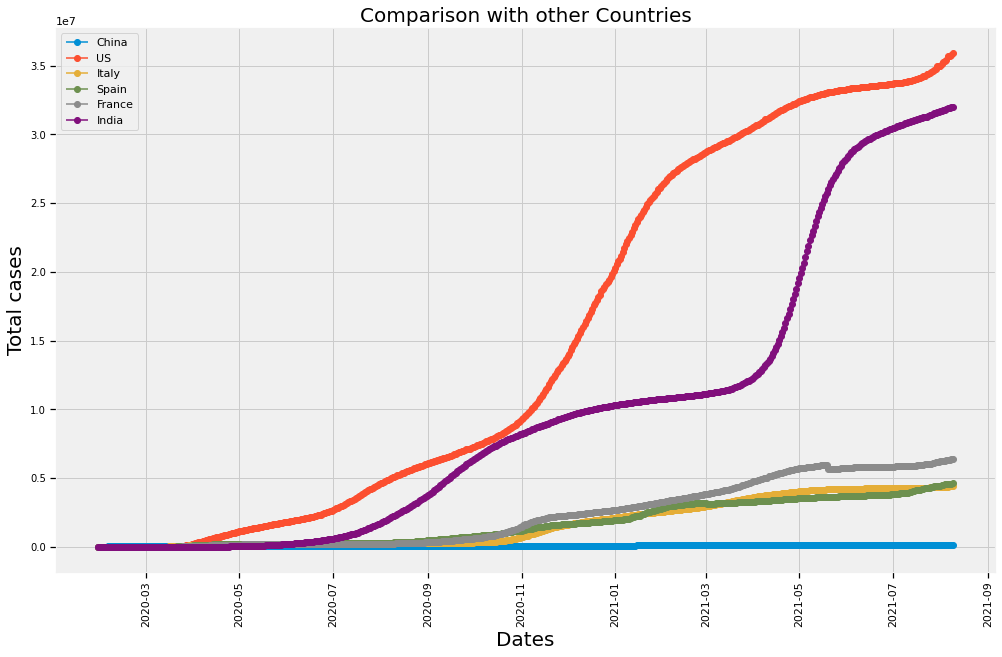

In [ ]:


age_details = pd.read_csv('/content/AgeGroupDetails.csv')
india_covid_19 = pd.read_csv('/content/covid_19_india.csv')
hospital_beds = pd.read_csv('/content/HospitalBedsIndia.csv')
individual_details = pd.read_csv('/content/IndividualDetails.csv')
ICMR_details = pd.read_csv('/content/ICMRTestingDetails(1).csv')
ICMR_labs = pd.read_csv('/content/ICMRTestingLabs.csv')
state_testing = pd.read_csv('/content/StatewiseTestingDetails.csv')
population = pd.read_csv('/content/population_india_census2011.csv')

world_population = pd.read_csv('/content/population_by_country_2020.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-04-2020.csv')

hotspots = ['China','Germany','Iran','Italy','Spain','US','Korea, South','France','Turkey','United Kingdom','India']
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]

df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

global_confirmed = {}
global_deaths = {}
global_recovered = {}
global_active= {}

for country in hotspots:
    k =df1[df1['Country/Region'] == country].loc[:,'1/30/20':]
    global_confirmed[country] = k.values.tolist()[0]

    k =df2[df2['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths[country] = k.values.tolist()[0]

    k =df3[df3['Country/Region'] == country].loc[:,'1/30/20':]
    global_recovered[country] = k.values.tolist()[0]

dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]
countries = ['China','US', 'Italy', 'Spain', 'France','India']

global_confirmed = []
global_recovered = []
global_deaths = []
global_active = []

for country in countries:
    k =df1[df1['Country/Region'] == country].loc[:,'1/30/20':]
    global_confirmed.append(k.values.tolist()[0])

plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Comparison with other Countries" , fontsize = 20)

for i in range(len(countries)):
    plt.plot_date(y= global_confirmed[i],x= dates_india,label = countries[i],linestyle ='-')
plt.legend();


In [ ]:
# Load Gtk
import gi
gi.require_version('Gtk', '4.0')
from gi.repository import Gtk

# When the application is launched…
def on_activate(app):
    # … create a new window…
    win = Gtk.ApplicationWindow(application=app)
    # … with a button in it…
    btn = Gtk.Button(label='Hello, World!')
    # … which closes the window when clicked
    btn.connect('clicked', lambda x: win.close())
    win.set_child(btn)
    win.present()

# Create a new application
app = Gtk.Application(application_id='com.example.GtkApplication')
app.connect('activate', on_activate)

# Run the application
app.run(None)

ImportError: ignored

In [ ]:
print(endmsg)

adnocana


#Part 4: Forecasting Total Number of Cases India


![](https://i.imgur.com/kElKzI2.png)

In [ ]:
li = ["flower","flow","fhoght"]
s = li[0]
res = ""
for i in range(0,len(li)):
  common=0
  for j in range(0,len(li)):
    if li[j][i]==s[i]:
      common=1
    else:
      common=0
      break
  if common==0:
    break
  res+=s[i]
print(res)



f == f
f == f
f == f
l == l
l == l
f


## 4.1 Prediction using growth factor <a id="9"></a>
#### Assuming the same growth factor continues for the next 15 days

In [ ]:
#Prediction using growth factor
df1 = df_confirmed.groupby('Country').sum().reset_index()

k = df1[df1['Country']=='India'].loc[:,'1/22/20':]
india_confirmed = k.values.tolist()[0]
data = pd.DataFrame(columns = ['ds','y'])
data['ds'] = dates
data['y'] = india_confirmed

In [ ]:
df1 = df_confirmed.groupby('Country').sum().reset_index()
df2 = df_deaths.groupby('Country').sum().reset_index()
df3 = df_recovered.groupby('Country').sum().reset_index()

k =df1[df1['Country']=='India'].loc[:,'2/4/20':]
india_confirmed = k.values.tolist()[0]

growth_diff = []

for i in range(1,len(india_confirmed)):
    growth_diff.append(india_confirmed[i] / india_confirmed[i-1])

growth_factor = sum(growth_diff)/len(growth_diff)
print('Average growth factor',growth_factor)


Average growth factor 1.0361904937557456


In [ ]:

prediction_dates = []
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]
start_date = dates_india[len(dates_india) - 1]
for i in range(15):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
previous_day_cases = global_confirmed[5][len(dates_india) - 1]
predicted_cases = []

for i in range(15):
    predicted_value = previous_day_cases *  growth_factor
    predicted_cases.append(predicted_value)
    previous_day_cases = predicted_value
'''
plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)'''
#plt.title("Predicted Values for the next 15 Days" , fontsize = 20)
#ax1 = plt.plot_date(y= predicted_cases,x= prediction_dates,linestyle ='-',color = 'c')
fig = go.Figure()
fig.add_trace(go.Scatter(x= prediction_dates, y=predicted_cases, mode='lines+markers', line=dict(color='blue', width=2),showlegend=True,name="covid19 cases"))

fig.update_layout(title='Predicted Values for the next 15 Days', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))



## Prophet
Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.

We use Prophet, a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

## Why Prophet?

* **Accurate and fast:**  Prophet is used in many applications across Facebook for producing reliable forecasts for planning and goal setting. Facebook finds it to perform better than any other approach in the majority of cases. It fit models in [Stan](https://mc-stan.org/) so that you get forecasts in just a few seconds.

* **Fully automatic:** Get a reasonable forecast on messy data with no manual effort. Prophet is robust to outliers, missing data, and dramatic changes in your time series.

* **Tunable forecasts:** The Prophet procedure includes many possibilities for users to tweak and adjust forecasts. You can use human-interpretable parameters to improve your forecast by adding your domain knowledge

* **Available in R or Python:** Facebook has implemented the Prophet procedure in R and Python. Both of them share the same underlying Stan code for fitting. You can use whatever language you’re comfortable with to get forecasts.




In [ ]:
from fbprophet import Prophet

In [ ]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
df1 = df_confirmed.groupby('Country').sum().reset_index()


confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])


In [ ]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

The input to Prophet is always a dataframe with two columns: **ds** and **y**. The **ds (datestamp)** column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.


##4.2 Forecasting Confirmed NCOVID-19 Cases in India with Prophet (Base model)

Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


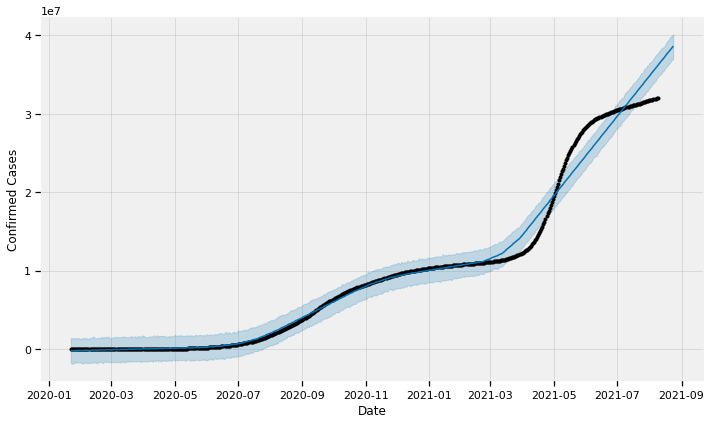

In [ ]:
#Forecasting Confirmed NCOVID-19 Cases in India with Prophet (Base model)
m = Prophet(interval_width=0.95)
k = df1[df1['Country']=='India'].loc[:,'1/22/20':]
india_confirmed = k.values.tolist()[0]
data = pd.DataFrame(columns = ['ds','y'])
data['ds'] = dates
data['y'] = india_confirmed

prop=Prophet()
prop.fit(data)
future=prop.make_future_dataframe(periods=15)
prop_forecast=prop.predict(future)
forecast = prop_forecast[['ds','yhat']].tail(30)

fig = plot_plotly(prop, prop_forecast)
fig = prop.plot(prop_forecast,xlabel='Date',ylabel='Confirmed Cases')

The **predict** method will assign each row in future a predicted value which it names **yhat**. If you pass in historical dates, it will provide an in-sample fit. The **forecast object** here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [ ]:
#predicting the future with date, and upper and lower limit of y value
prop_forecast[['ds', 'trend', 'yhat_lower', 'yhat_upper']]
forecast =  prop.predict(future)


In [ ]:

m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [ ]:

prop_forecast[prop_forecast['ds']=='2020-10-04']

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
256,2020-10-04,6.238148e+06,4.732146e+06,7.802722e+06,6.238148e+06,6.238148e+06,-11802.260693,-11802.260693,-11802.260693,-11802.260693,-11802.260693,-11802.260693,0.0,0.0,0.0,6.226345e+06


You can plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe.

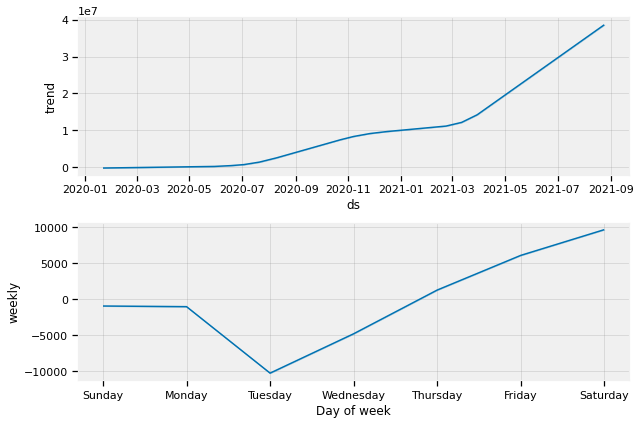

In [ ]:
recovered_forecast_plot = m.plot_components(prop_forecast)

##4.5 Prediction using ARIMA <a id="11"></a>

In [ ]:
#Prediction using ARIMA
df1 = df_confirmed.groupby('Country').sum().reset_index()
k = df1[df1['Country']=='India'].loc[:,'1/22/20':]
india_confirmed = k.values.tolist()[0]
data = pd.DataFrame(columns = ['ds','y'])
data['ds'] = dates
data['y'] = india_confirmed



Timestamp('2021-08-09 00:00:00')

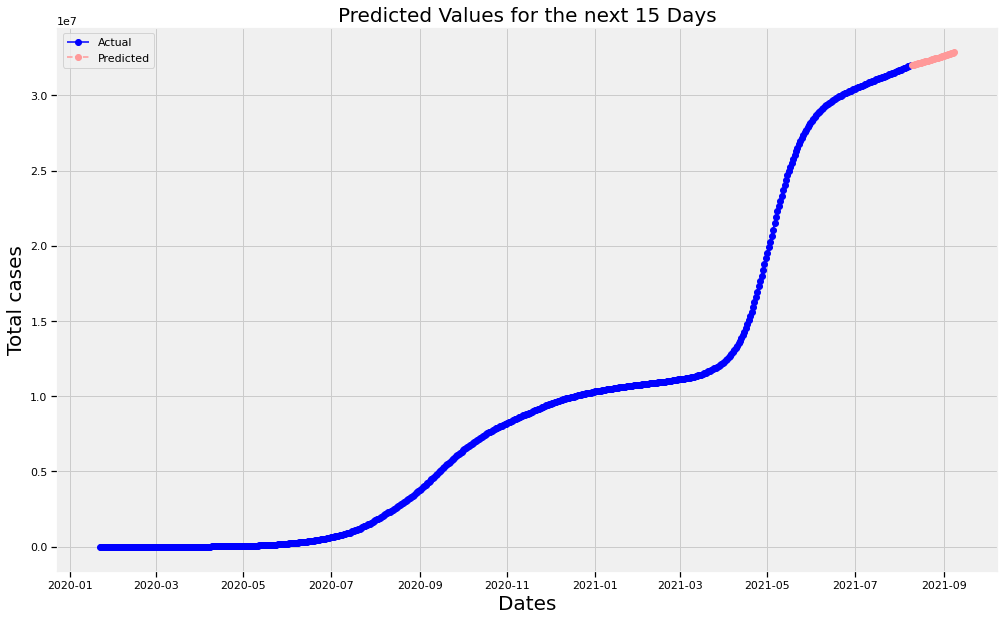

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
arima = ARIMA(data['y'], order=(5, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 30)
pred = list(forecast[0])

start_date = data['ds'].max()
prediction_dates = []
for i in range(30):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (15,10))
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Predicted Values for the next 15 Days" , fontsize = 20)
plt.plot_date(y=data['y'],x=data['ds'],linestyle = '-',color = 'blue',label = 'Actual');
plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = '#ff9999',label = 'Predicted');
plt.plot
plt.legend()
data['ds'].max()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
arima = ARIMA(data['y'], order=(5, 1, 0))

arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 15)
pred = list(forecast[0])

start_date = data['ds'].max()
prediction_dates = []
for i in range(30):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date

fig = go.Figure()

fig.add_trace(go.Scatter(x= prediction_dates, y=pred, mode='lines+markers', line=dict(color='blue', width=2),showlegend=True,name="covid19 cases"))
fig.update_layout(title='Predicted Values for the next 15 Days', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

In [ ]:
x = [[3,5],"mimsy",2,"borogove",1]  # Statement 1
y = x[0:50]                          # Statement 2
z = y                                # Statement 3
w = x                                # Statement 4
x[1] = x[1][:5] + 'ery'              # Statement 5
y[1] = 4                             # Statement 6
w[1][:3] = 'fea'                     # Statement 7
z[4] = 42                            # Statement 8
x[0][0] = 5555                       # Statement 9
a = (x[3][1] == 1)

TypeError: ignored

## 4.6 Age Group Analysis

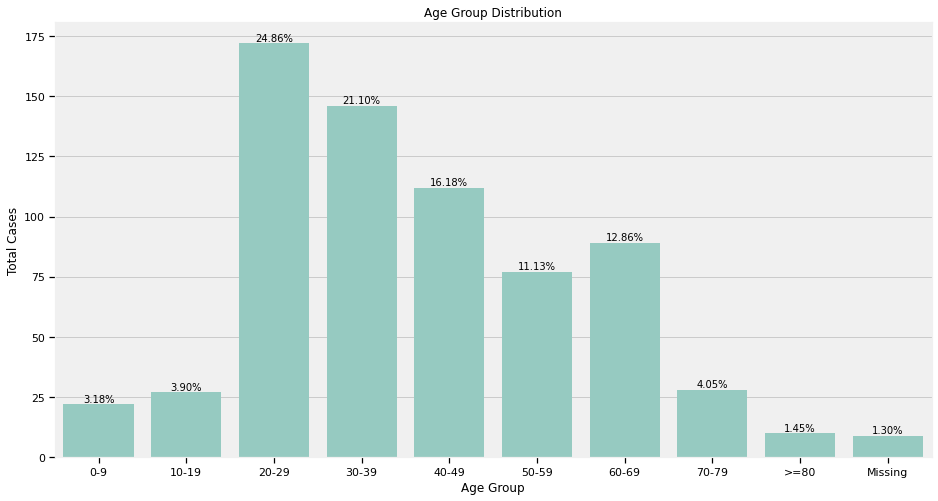

In [ ]:
ageGroup = pd.read_csv('/content/AgeGroupDetails.csv')
plt.figure(figsize=(14,8))
sns.barplot(data=ageGroup,x='AgeGroup',y='TotalCases',color=sns.color_palette('Set3')[0])
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Total Cases')
for i in range(ageGroup.shape[0]):
    count = ageGroup.iloc[i]['TotalCases']
    plt.text(i,count+1,ageGroup.iloc[i]['Percentage'],ha='center')

from IPython.display import display, Markdown

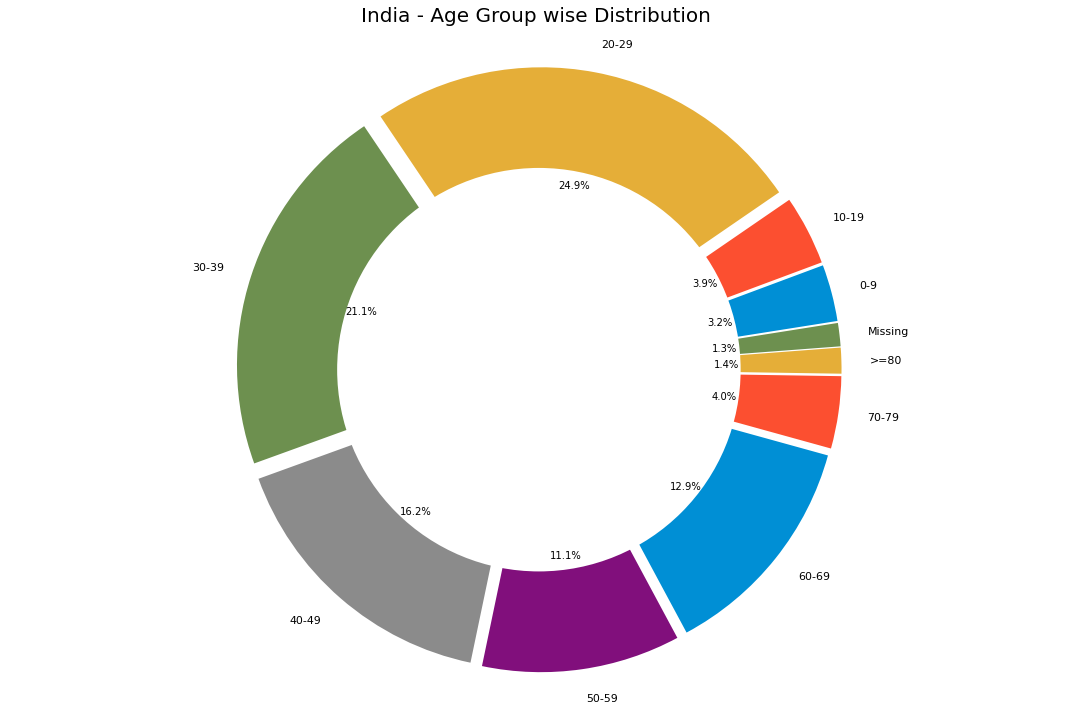

In [ ]:
labels = list(ageGroup['AgeGroup'])
sizes = list(ageGroup['TotalCases'])

explode = []

for i in labels:
    explode.append(0.05)

plt.figure(figsize= (15,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('India - Age Group wise Distribution',fontsize = 20)
plt.axis('equal')
plt.tight_layout()

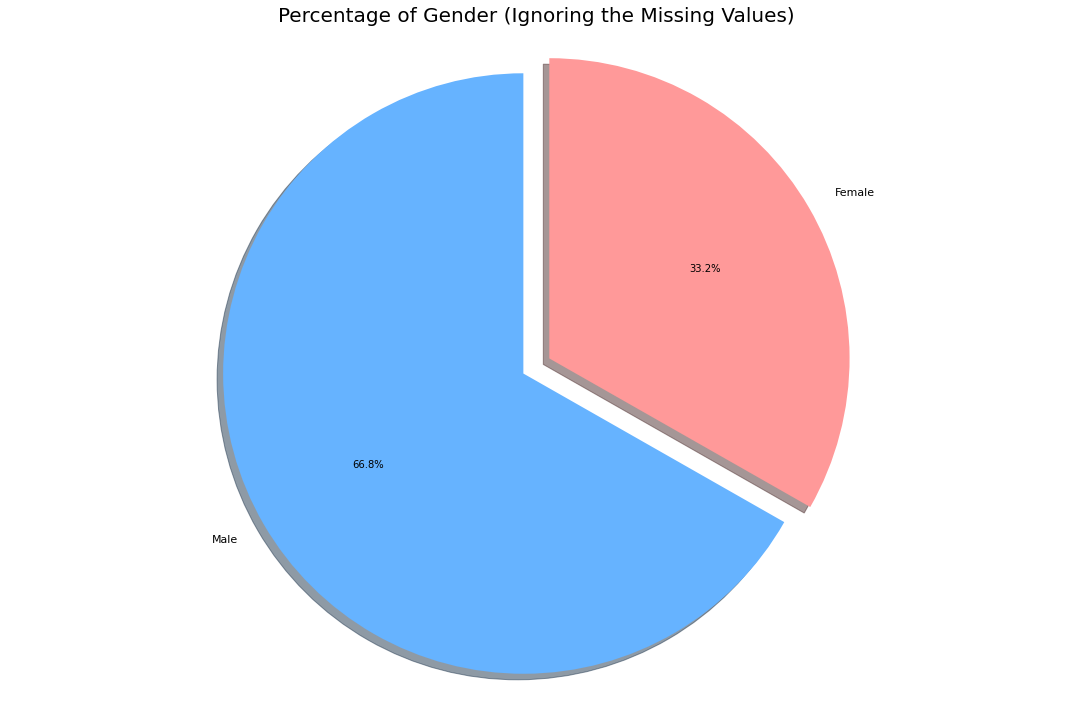

In [ ]:
individual_details = pd.read_csv('/content/IndividualDetails.csv')
labels = ['Male', 'Female']
sizes = []
sizes.append(list(individual_details['gender'].value_counts())[0])
sizes.append(list(individual_details['gender'].value_counts())[1])

explode = (0.1, 0)
colors = ['#66b3ff','#ff9999']

plt.figure(figsize= (15,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.title('Percentage of Gender (Ignoring the Missing Values)',fontsize = 20)
plt.axis('equal')
plt.tight_layout()

##4.7 checking covid 19 status of user


In [ ]:
import re
def check_phone(num):
    if re.match(r'[789]\d{9}$',num):
        return True
    else:
        return False
def accept(inp):
    if inp=='y' or inp=='Y':
        return True
    else:
        return False

In [ ]:
df = pd.read_csv('/content/covid19.csv')
df
#import pandas as pd
#index = ['Name','Gender','Age','Phone No','Email','Location','Symptoms','hand_wash','mask','dist','exer','disorder','roaming','out_side','Tag']
#df = pd.DataFrame(columns=index)
#df
#df.to_csv('/content/covid19.csv',index=False)
#df

,Name,Age,hand_wash,mask,dist,exer,disorder,roaming,out_side


In [ ]:
#explicit identifier
t=True
name=input('Enter the name\n')
gender = input('Enter the Gender 1)Male 2)Female')
age=int(input('Enter the age\n'))
while t is True:
    phone_no = input('Enter the Phone Number\n')
    if(check_phone(phone_no)):
        t=False
    else:
        print('Phone No is incorrect\n')

email_id = input('Enter the Email Id\n')
location = input('Enter the location\n')

#quasi identifier
print('Please enter the y for (Yes) or n for (No) for below question\n')

symptoms = input('Enter any symptoms you have\n')
any_other_disorder = input('Do you have any other Disorder?\n')

hand_wash = accept(input('Do you hand wash regularly?\n'))
mask=accept(input('Do you wear the mask when go outside?\n'))
dist=accept(input('Do you maintain social distancing?\n'))
exer=accept(input('Do you doing exercise daily or sports regularly?\n'))
disorder=accept(input('Do you suffer from any long disorder?\n'))
roaming=accept(input('Do you roaming regularly?\n'))
out_side=accept(input('Do you traveling outofstation resently?\n'))
IRP = accept(input('Do you want disclose this information with others?\n'))


Enter the name
jk
Enter the Gender 1)Male 2)FemaleMale
Enter the age
34
Enter the Phone Number
9980833830
Enter the Email Id
m@gmail.com
Enter the location
bengaluru
Please enter the y for (Yes) or n for (No) for below question

Enter any symptoms you have
n
Do you have any other Disorder?
n
Do you hand wash regularly?
y
Do you wear the mask when go outside?
n
Do you maintain social distancing?
y
Do you doing exercise daily or sports regularly?
n
Do you suffer from any long disorder?
n
Do you roaming regularly?
n
Do you traveling outofstation resently?
y
Do you want disclose this information with others?
y


In [ ]:
hidig_data = '#######'
#index = ['Name','Age','Phone No','Email','Location','Fever','Cough','Troat Pain','Taste Loss','Smell Loss','Lung Disorder','hand_wash','mask','dist','exer','disorder','roaming','out_side','Tag']

if(IRP==True):
    dic={'Name':'Person','Gender':hidig_data,'Age':hidig_data,'Phone No':hidig_data,'Email':hidig_data,'Location':hidig_data,'Symptoms':symptoms,'hand_wash':hand_wash,'mask':mask,'dist':dist,'exer':exer,'disorder':disorder,'roaming':roaming,'out_side':out_side,'Tag':1}

else:
    dic={'Name':name,'Gender':gender,'Age':age,'Phone No':phone_no,'Email':email_id,'Location':location,'Symptoms':symptoms,'hand_wash':hand_wash,'mask':mask,'dist':dist,'exer':exer,'disorder':disorder,'roaming':roaming,'out_side':out_side,'Tag':0}
import pandas as pd
import chardet




df=df.append(dic,ignore_index = True)
df.to_csv("/content/covid19.csv",index=False)




#df1[['Name','Age','Phone_No','Email','hand_wash','mask','dist','exer','disorder','roaming','out_side']]

print('Based on the age\n')
if 0<age<=19 or 70<age:
    print("You are in safe!!!\n")
elif 40<=age<=69:
    print("You have to not in danger but dont negelect symptoms covid19\n")
else:
    print("You have to be more carefull!!!\n ")

print('Based on your life style\n')
if hand_wash==True and mask==True and  dist==True and  exer==True and  disorder==True and  out_side==True:
    print('Good you are safe :)\n')
else:
    print('Please take care. your life style make a healthy life style! :(\n')

In [ ]:
df1 = pd.read_csv('/content/covid19.csv')
df1

,Name,Age,hand_wash,mask,dist,exer,disorder,roaming,out_side


##4.8 Inference from the above Analysis and Forecast
###Will Indian become the next Italy/ S.Korea/ Wuhan?


Yes, if you look at the world's data and its forecast you can say that India might face one of its worst days if we are not taking strict measures against COVID-19.

###**A Humble Request to all of us please TEST, TEST, TEST: COVID-19**
Don't take your cough and cold lighly as before. If you look at the data number of cases in India is rising but not like in Italy, Wuhan, S.Korea, Spain, or USA. Don't get fool by these numbers (COVID cases in India). I think the number is less because of low awareness and less tests being conducted in India. Currently India is a deadly and risky zone as there are very few COVID-19 test centres in India.  Imagine how many infected people are still around you and are infecting others unknowingly. Remember **India ranks 145** in terms of global healthcare rank while [Italy is on 2nd](https://worldpopulationreview.com/countries/best-healthcare-in-the-world/).


- Indian government's decision for today confirms that the above prediction is definitely something we pay attention to.
- Please stay home/indoors for all 21 days. This will definitely help us tackle the situation. It won't stop the pandemic, but it would definitely help us reduce the exponential rate at which it is increasing.
- Let's give a hand in fighting this pandemic atleast by quarantining ourselves by staying indoors and protecting you and your family.
- Go and get a checkup done in case you are suffering from cough,cold, fever, shortness of breath and breathing difficulties. Can't tell for sure but(due to lack of data) , but it might be possible that we don't have the exact number of the COVID-19 cases in India becasuse sometimes it takes weeks to see the first sign/symptom for it.
- If you're not getting the checkup done, you might add in spreading the virus unintentionally
- Its time we take this pandemic seriously - **LIVE & HELP OTHERS LIVE**
- Take precautions, stay indoors, and utilize this time to develop your machine learning skill with edureka's AI-ML PGP and help the world with your machine learning models.

#COVID-19 Symptoms


![title](https://imgur.com/GRLx6JZ.png)

![](https://media.giphy.com/media/Qu1fT51CG14ksIkASL/giphy.gif)


![](https://media0.giphy.com/media/WOkuHrhNv4LQVeSoik/giphy.gif?cid=ecf05e4748c6ef5d1983f3a0b50e6195a51aa49635340b4c&rid=giphy.gif)

In [ ]:
def power(num,n):
    res = 1
    for i in range(1,n+1):
        res*=num
    return res


In [ ]:
def sumprime(num):
    sum = 0
    isprime = false

    for n in range(1,num+1):

      for(i=2;i<=n/2;i++):
        if n%i==0:
          isprime = false
          continue
        else
          isprime = true
      if isptime:
        sum+=n
    return





321


In [ ]:
def matched(string):
  stack = []
  for i in range(0,len(string)+1):
      if string[i]=='(':
        stack.append('(')
      elif string[i] == ')':
        stack.pop()
  if stack

19
